In [1]:
!pip install py2neo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.2/177.2 kB 1.6 MB/s eta 0:00:00


In [3]:
from py2neo import Graph

# credenciais do Neo4j
NEO4J_URI = "bolt://3.84.50.191"
NEO4J_USERNAME = "neo4j"
NEO4J_PASSWORD = "bone-caution-hall"
NEO4J_DATABASE = "neo4j"

# Conectar ao Neo4j
graph = Graph(NEO4J_URI, auth=(NEO4J_USERNAME, NEO4J_PASSWORD))

# Testar a conexão
print(graph.run("RETURN 1").data())

[{'1': 1}]


# Executar comandos abaixo:
https://lvdamacenoblog.wordpress.com/2018/06/29/first-steps-neo4j/


### **Executar os Comandos de Criação e Manipulação de Dados**

#### **Criar nós de Músicos e Músicas**

In [9]:
# Criar músicos e músicas
graph.run("""
CREATE (dylan:Musico {nome: 'Bob Dylan', data_de_nascimento: '1941-05-24'}),
       (hendrix:Musico {nome: 'Jimi Hendrix'}),
       (al_along:Musica {nome: 'All Along The Watchtower'});
""")

(No data)

#### **Criar relacionamentos entre Músicos e Músicas**

- **Hendrix gravou "All Along The Watchtower"**:


In [10]:
graph.run("""
MATCH (hendrix:Musico {nome:'Jimi Hendrix'}), (al_along:Musica {nome:'All Along The Watchtower'})
CREATE (hendrix)-[:gravou]->(al_along);
""")

(No data)

- **Bob Dylan gravou e compôs "All Along The Watchtower"**:


In [11]:
graph.run("""
MATCH (bob:Musico {nome: 'Bob Dylan'}), (al_along:Musica {nome: 'All Along The Watchtower'})
CREATE (bob)-[:gravou]->(al_along),
       (bob)-[:compos]->(al_along);
""")

(No data)

#### **Consultas Básicas**

- **Retornar os nomes dos músicos**:


In [12]:
result = graph.run("MATCH (m:Musico) RETURN m.nome")
for record in result:
    print(record["m.nome"])

Bob Dylan
Jimi Hendrix


- **Retornar todo o grafo (todos os nós)**:


In [13]:
result = graph.run("MATCH (m) RETURN m")
for record in result:
    print(record)

Node('Movie', released=1999, tagline='Welcome to the Real World', title='The Matrix')
Node('Person', born=1964, name='Keanu Reeves')
Node('Person', born=1967, name='Carrie-Anne Moss')
Node('Person', born=1961, name='Laurence Fishburne')
Node('Person', born=1960, name='Hugo Weaving')
Node('Person', born=1967, name='Lilly Wachowski')
Node('Person', born=1965, name='Lana Wachowski')
Node('Person', born=1952, name='Joel Silver')
Node('Person', born=1978, name='Emil Eifrem')
Node('Movie', released=2003, tagline='Free your mind', title='The Matrix Reloaded')
Node('Movie', released=2003, tagline='Everything that has a beginning has an end', title='The Matrix Revolutions')
Node('Movie', released=1997, tagline='Evil has its winning ways', title="The Devil's Advocate")
Node('Person', born=1975, name='Charlize Theron')
Node('Person', born=1940, name='Al Pacino')
Node('Person', born=1944, name='Taylor Hackford')
Node('Movie', released=1992, tagline="In the heart of the nation's capital, in a court

- **Retornar nós que possuem arestas incidentes (conectadas a eles)**:


In [14]:
result = graph.run("MATCH (n1)<-[]-() RETURN n1")
for record in result:
    print(record)

Node('Movie', released=1999, tagline='Welcome to the Real World', title='The Matrix')
Node('Movie', released=1999, tagline='Welcome to the Real World', title='The Matrix')
Node('Movie', released=1999, tagline='Welcome to the Real World', title='The Matrix')
Node('Movie', released=1999, tagline='Welcome to the Real World', title='The Matrix')
Node('Movie', released=1999, tagline='Welcome to the Real World', title='The Matrix')
Node('Movie', released=1999, tagline='Welcome to the Real World', title='The Matrix')
Node('Movie', released=1999, tagline='Welcome to the Real World', title='The Matrix')
Node('Movie', released=1999, tagline='Welcome to the Real World', title='The Matrix')
Node('Movie', released=2003, tagline='Free your mind', title='The Matrix Reloaded')
Node('Movie', released=2003, tagline='Free your mind', title='The Matrix Reloaded')
Node('Movie', released=2003, tagline='Free your mind', title='The Matrix Reloaded')
Node('Movie', released=2003, tagline='Free your mind', title

- **Retornar todos os relacionamentos entre músicos e músicas**:


In [15]:
result = graph.run("MATCH (n1:Musico)-[r]->(n2:Musica) RETURN n1, type(r), n2")
for record in result:
    print(f"{record['n1']['nome']} {record['type(r)']} {record['n2']['nome']}")

Bob Dylan compos All Along The Watchtower
Bob Dylan gravou All Along The Watchtower
Jimi Hendrix gravou All Along The Watchtower



#### **Modificar ou Excluir Atributos**

- **Modificar a data de nascimento de Jimi Hendrix**:


In [16]:
graph.run("""
MATCH (hendrix:Musico {nome: 'Jimi Hendrix'})
SET hendrix.data_de_nascimento = '1942-11-27';
""")

(No data)

- **Excluir a data de nascimento de Jimi Hendrix**:


In [17]:
graph.run("""
MATCH (hendrix:Musico {nome: 'Jimi Hendrix'})
SET hendrix.data_de_nascimento = null;
""")

(No data)

#### **Excluir Nós e Relacionamentos**

- **Excluir todos os relacionamentos de Jimi Hendrix e depois o próprio nó**:


In [24]:
graph.run("""
MATCH (hendrix:Musico {nome: 'Jimi Hendrix'})-[r]-()
DELETE r;
""")

graph.run("""
MATCH (hendrix:Musico {nome: 'Jimi Hendrix'})
DELETE hendrix;
""")

(No data)

- **Excluir todo o banco de dados (todos os nós e relacionamentos)**:


In [19]:
graph.run("""
MATCH (n)
OPTIONAL MATCH (n)-[rel]-()
DELETE rel, n;
""")

(No data)

#### **Evitar Duplicidade com MERGE**

- **Usar MERGE para evitar duplicidade na criação de nós**:


In [20]:
graph.run("""
MERGE (n1:Musico {nome: 'Bob Dylan'})
MERGE (n2:Musico {nome: 'Bob Dylan'});
""")

(No data)

### **Leitura de Arquivo CSV e Inserção no Neo4j**

Você também pode importar dados de um arquivo CSV. Para isso, o arquivo CSV deve estar disponível na pasta **Imports** do Neo4j. O comando seria semelhante ao seguinte (assumindo que você já tenha um arquivo CSV):


In [ ]:
graph.run("""
LOAD CSV WITH HEADERS FROM "file:///nome_do_arquivo.csv" AS linha
MERGE (compositor:Musico {nome: linha.compositor})
MERGE (musica:Musica {nome: linha.musica})
MERGE (compositor)-[:compos]->(musica);
""")


### **Consultas Mais Complexas**

- **Retornar músicos que gravaram uma música e o compositor dessa música**:


In [22]:
result = graph.run("""
MATCH (interprete:Musico)-[gravou:gravou]->(musica:Musica)
MATCH (compositor:Musico)-[compos:compos]->(musica:Musica)
RETURN interprete.nome AS interprete, musica.nome AS musica, compositor.nome AS compositor
""")
for record in result:
    print(f"Interprete: {record['interprete']}, Música: {record['musica']}, Compositor: {record['compositor']}")

- **Retornar músicas gravadas por Jon Bon Jovi e o compositor**:


In [26]:
result = graph.run("""
MATCH (interprete:Musico)-[gravou:gravou]->(musica:Musica)
MATCH (compositor:Musico)-[compos:compos]->(musica:Musica)
WHERE interprete.nome = 'Jon Bon Jovi'
RETURN interprete.nome AS interprete, musica.nome AS musica, compositor.nome AS compositor
""")
for record in result:
    print(f"Interprete: {record['interprete']}, Música: {record['musica']}, Compositor: {record['compositor']}")

# **Importar os nós de filmes (Movie)**
   
   Execute o comando Cypher para importar os nós de filmes do CSV:


In [33]:
result = graph.run("""
CALL {
    LOAD CSV WITH HEADERS FROM
    'https://gquercini.github.io/courses/plp/tutorials/neo4j/movies.csv' AS row
    WITH row
    MERGE (m:Movie {movie_id: toInteger(row.movie_id), title_en: row.movie_title_en,
    title_fr: row.movie_title_fr, year: toInteger(row.movie_year)})
} IN TRANSACTIONS OF 1000 ROWS
""").data()

# Verificar a contagem de nós 'Movie'
count_movies = graph.run("MATCH (m:Movie) RETURN count(m) AS total_movies").data()
print(count_movies)

[{'total_movies': 9125}]


**Criar um índice na propriedade `movie_id` dos nós `Movie`**:


In [ ]:
graph.run("CREATE INDEX movie_idx FOR (m:Movie) ON (m.movie_id);")

In [36]:
result = graph.run("SHOW INDEXES;").data()
for idx in result:
    print(idx)

{'id': 8, 'name': '__org_neo4j_schema_index_label_scan_store_converted_to_token_index', 'state': 'ONLINE', 'populationPercent': 100.0, 'type': 'LOOKUP', 'entityType': 'NODE', 'labelsOrTypes': None, 'properties': None, 'indexProvider': 'token-lookup-1.0', 'owningConstraint': None, 'lastRead': DateTime(2024, 10, 5, 21, 31, 18.457, tzinfo=<UTC>), 'readCount': 9139}
{'id': 9, 'name': 'constraint_3044d997', 'state': 'ONLINE', 'populationPercent': 100.0, 'type': 'RANGE', 'entityType': 'NODE', 'labelsOrTypes': ['Movie'], 'properties': ['title'], 'indexProvider': 'range-1.0', 'owningConstraint': 'constraint_3044d997', 'lastRead': DateTime(2024, 10, 5, 21, 6, 27.746, tzinfo=<UTC>), 'readCount': 4}
{'id': 7, 'name': 'constraint_e26b1a8b', 'state': 'ONLINE', 'populationPercent': 100.0, 'type': 'RANGE', 'entityType': 'NODE', 'labelsOrTypes': ['Person'], 'properties': ['name'], 'indexProvider': 'range-1.0', 'owningConstraint': 'constraint_e26b1a8b', 'lastRead': None, 'readCount': 0}
{'id': 10, 'nam

**Importar os nós de atores (Actor)**:

In [37]:
graph.run("""
CALL {
    LOAD CSV WITH HEADERS FROM
    'https://gquercini.github.io/courses/plp/tutorials/neo4j/actors.csv' AS row
    WITH row
    MERGE (a:Actor {actor_id: toInteger(row.actor_id), name: row.actor_name})
} IN TRANSACTIONS OF 1000 ROWS
RETURN count(*);
""")

count(*)
1


**Criar um índice na propriedade `actor_id` dos nós `Actor`**:


In [38]:
graph.run("CREATE INDEX actor_idx FOR (a:Actor) ON (a.actor_id);")

(No data)

In [39]:
result = graph.run("SHOW INDEXES;").data()
for idx in result:
    print(idx)

{'id': 8, 'name': '__org_neo4j_schema_index_label_scan_store_converted_to_token_index', 'state': 'ONLINE', 'populationPercent': 100.0, 'type': 'LOOKUP', 'entityType': 'NODE', 'labelsOrTypes': None, 'properties': None, 'indexProvider': 'token-lookup-1.0', 'owningConstraint': None, 'lastRead': DateTime(2024, 10, 5, 21, 37, 41.464, tzinfo=<UTC>), 'readCount': 25117}
{'id': 2, 'name': 'actor_idx', 'state': 'ONLINE', 'populationPercent': 100.0, 'type': 'RANGE', 'entityType': 'NODE', 'labelsOrTypes': ['Actor'], 'properties': ['actor_id'], 'indexProvider': 'range-1.0', 'owningConstraint': None, 'lastRead': None, 'readCount': None}
{'id': 9, 'name': 'constraint_3044d997', 'state': 'ONLINE', 'populationPercent': 100.0, 'type': 'RANGE', 'entityType': 'NODE', 'labelsOrTypes': ['Movie'], 'properties': ['title'], 'indexProvider': 'range-1.0', 'owningConstraint': 'constraint_3044d997', 'lastRead': DateTime(2024, 10, 5, 21, 6, 27.746, tzinfo=<UTC>), 'readCount': 4}
{'id': 7, 'name': 'constraint_e26b1

**Importar os nós de diretores (Director)**:

In [41]:
graph.run("""
CALL {
    LOAD CSV WITH HEADERS FROM
    'https://gquercini.github.io/courses/plp/tutorials/neo4j/directors.csv' AS row
    WITH row
    MERGE (d:Director {director_id: toInteger(row.director_id), name: row.director_name})
} IN TRANSACTIONS OF 1000 ROWS
RETURN count(*);
""")

count(*)
1


**Criar um índice na propriedade `director_id` dos nós `Director`**:

In [42]:
graph.run("CREATE INDEX director_idx FOR (d:Director) ON (d.director_id);")

(No data)

**Importar os gêneros (Genre)**:

In [44]:
graph.run("""
CALL {
    LOAD CSV WITH HEADERS FROM
    'https://gquercini.github.io/courses/plp/tutorials/neo4j/genres.csv' AS row
    WITH row
    MERGE (g:Genre {genre_id: toInteger(row.genre_id), name: row.genre_name})
} IN TRANSACTIONS OF 1000 ROWS
RETURN count(*);
""")

count(*)
1


**Criar um índice na propriedade `genre_id` dos nós `Genre`**:


In [45]:
graph.run("CREATE INDEX genre_idx FOR (g:Genre) ON (g.genre_id);")

(No data)

**Importar os usuários (User)**:

In [47]:
graph.run("""
CALL {
    LOAD CSV WITH HEADERS FROM
    'https://gquercini.github.io/courses/plp/tutorials/neo4j/users.csv' AS row
    WITH row
    MERGE (u:User {user_id: toInteger(row.user_id), name: row.user_nickname})
} IN TRANSACTIONS OF 1000 ROWS
RETURN count(*);
""")

count(*)
1


**Criar um índice na propriedade `user_id` dos nós `User`**:


In [48]:
graph.run("CREATE INDEX user_idx FOR (u:User) ON (u.user_id);")

(No data)

**Importar os relacionamentos `ACTED_IN` entre atores e filmes**:


In [50]:
graph.run("""
CALL {
    LOAD CSV WITH HEADERS FROM
    'https://gquercini.github.io/courses/plp/tutorials/neo4j/movies_actors.csv' AS row
    WITH row
    MATCH (m:Movie {movie_id: toInteger(row.movie_id)})
    MATCH (a:Actor {actor_id: toInteger(row.actor_id)})
    MERGE (a)-[r:ACTED_IN]->(m)
} IN TRANSACTIONS OF 1000 ROWS
RETURN count(*);
""")

count(*)
1


**Importar os relacionamentos `DIRECTED` entre diretores e filmes**:


In [52]:
graph.run("""
CALL {
    LOAD CSV WITH HEADERS FROM
    'https://gquercini.github.io/courses/plp/tutorials/neo4j/movies_directors.csv' AS row
    WITH row
    MATCH (m:Movie {movie_id: toInteger(row.movie_id)})
    MATCH (d:Director {director_id: toInteger(row.director_id)})
    MERGE (d)-[r:DIRECTED]->(m)
} IN TRANSACTIONS OF 1000 ROWS
RETURN count(*);
""")

count(*)
1


**Importar os relacionamentos `HAS_GENRE` entre filmes e gêneros**:


In [54]:
graph.run("""
CALL {
    LOAD CSV WITH HEADERS FROM
    'https://gquercini.github.io/courses/plp/tutorials/neo4j/movies_genres.csv' AS row
    WITH row
    MATCH (m:Movie {movie_id: toInteger(row.movie_id)})
    MATCH (g:Genre {genre_id: toInteger(row.genre_id)})
    MERGE (m)-[r:HAS_GENRE]->(g)
} IN TRANSACTIONS OF 1000 ROWS
RETURN count(*);
""")

count(*)
1


**Importar os relacionamentos `RATED` entre usuários e filmes**:


In [56]:
graph.run("""
CALL {
    LOAD CSV WITH HEADERS FROM
    'https://gquercini.github.io/courses/plp/tutorials/neo4j/user_rates.csv' AS row
    WITH row
    MATCH (m:Movie {movie_id: toInteger(row.movie_id)})
    MATCH (u:User {user_id: toInteger(row.user_id)})
    MERGE (u)-[r:RATED {rate: toFloat(row.rate)}]->(m)
} IN TRANSACTIONS OF 1000 ROWS
RETURN count(*);
""")

count(*)
1


# Exercícios


### **Exercício 1.1: Consulta sobre o filme "Toy Story"**

**Consulta:**

In [58]:
result = graph.run("""
MATCH (m:Movie {title_en: "Toy Story"})
RETURN m;
""").data()

# Ver o resultado
for record in result:
    print(record)

{'m': Node('Movie', movie_id=20796, title_en='Toy Story', title_fr='Toy Story', year=1995)}


### **Exercício 1.2: Análise dos Nós Vizinhos**

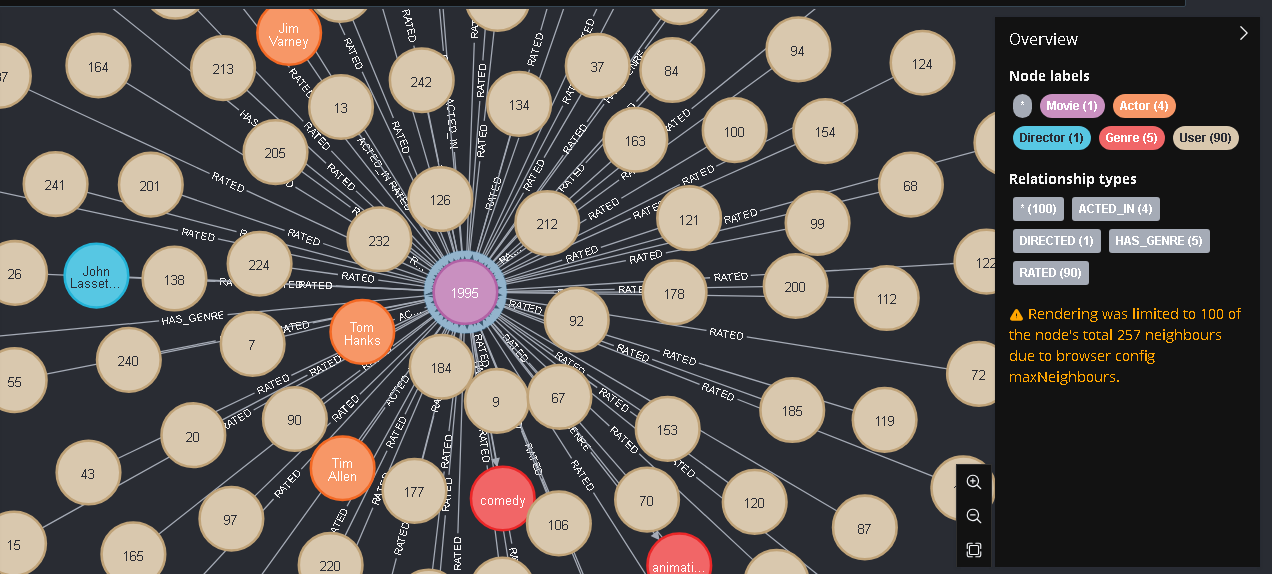

### Análise dos Nós Vizinhos

 **Rótulos dos Nós Vizinhos**:
   - **Actor (4)**: Há 4 nós representando atores que atuaram no filme "Toy Story". Por exemplo, podemos ver os atores **Tom Hanks**, **Tim Allen**, e outros.
   - **Director (1)**: O filme foi dirigido por **John Lasseter**.
   - **Genre (1)**: O gênero do filme é representado pelo nó "comedy" (comédia).
   - **User (90)**: Existem muitos nós de usuários (90) que avaliaram o filme. Cada um está conectado ao filme por meio do relacionamento `RATED`.

 **Tipos de Relacionamentos**:
   - **ACTED_IN**: Relacionamento entre os nós de atores e o filme, indicando que esses atores atuaram no filme.
   - **DIRECTED**: Relacionamento entre o diretor (John Lasseter) e o filme, indicando que ele dirigiu o filme.
   - **HAS_GENRE**: Relacionamento entre o filme e o gênero (comédia).
   - **RATED**: Relacionamentos entre usuários e o filme, mostrando as avaliações feitas pelos usuários. Há muitos usuários conectados ao filme através desse relacionamento, o que indica que o filme foi avaliado por várias pessoas.


### **Exercício 1.3: Outras Consultas**

**A. Gêneros dos filmes no banco de dados:**


In [59]:
result = graph.run("""
MATCH (g:Genre)
RETURN g.name;
""").data()

# Exibir os gêneros
for record in result:
    print(record["g.name"])

romance
fantasy
horror
musical
comedy
war
imax
thriller
animation
adventure
drama
mystery
children
sci-fi
action
crime
western
film-noir
documentary


**B. Número de filmes no banco de dados:**


In [60]:
result = graph.run("""
MATCH (m:Movie)
RETURN count(m) AS total_movies;
""").data()

# Exibir o número de filmes
print(result[0]["total_movies"])

9125



**C. Título dos filmes lançados em 2015:**


In [61]:
result = graph.run("""
MATCH (m:Movie {year: 2015})
RETURN m.title_en;
""").data()

# Exibir os títulos
for record in result:
    print(record["m.title_en"])

The Atticus Institute
Manson Family Vacation
Last Knights
The Jinx: The Life and Deaths of Robert Durst
Woman in Gold
A Very Murray Christmas
Schneider vs. Bax
Tomorrowland
Ex Machina
Truth
Paul Blart: Mall Cop 2
The Big Short
The Ridiculous 6
Monkey Kingdom
The Age of Adaline
Danny Collins
World of Tomorrow
A Girl Like Her
Grandma
San Andreas
Far from the Madding Crowd
Sisters
Daddy's Home
Marco Polo: One Hundred Eyes
Hitman: Agent 47
Bajirao Mastani
Ricki and the Flash
Partisan
Infini
Pitch Perfect 2
Carol
The Lobster
Maggie
Hot Pursuit
The Human Centipede III
Jurassic World
Close Range
The Martian
Return to Sender
Kung Fury
Survivor
Maze Runner: Scorch Trials
Spy
Trainwreck
Making a Murderer
Aloha
She's Funny That Way
Entourage
Inside Out
The Wolfpack
The Hunger Games: Mockingjay - Part 2
Pixels
A Deadly Adoption
Self/less
Kingsman: The Secret Service
The Last Witch Hunter
Ted 2
Minions
Black Mass
The Good Dinosaur
Spectre
Sharknado 3: Oh Hell No!
Steve Jobs
Vacation
The Face of an 

**D. Número de diretores por filme, classificado em ordem decrescente:**


In [62]:
result = graph.run("""
MATCH (m:Movie)<-[:DIRECTED]-(d:Director)
WITH m, count(d) AS num_directors
RETURN m.title_en, num_directors
ORDER BY num_directors DESC;
""").data()

# Exibir os resultados
for record in result:
    print(f"{record['m.title_en']} - {record['num_directors']} diretores")

A saída de streaming foi truncada nas últimas 5000 linhas.
A Smile Like Yours - 1 diretores
The Great Gatsby - 1 diretores
Born in East L.A. - 1 diretores
Burn Notice: The Fall of Sam Axe - 1 diretores
The Avengers - 1 diretores
Tall Tale - 1 diretores
Benny & Joon - 1 diretores
Diabolique - 1 diretores
Christmas Vacation - 1 diretores
Songs From the Second Floor - 1 diretores
A Swedish Love Story - 1 diretores
When We Were Kings - 1 diretores
Kids in America - 1 diretores
Conception - 1 diretores
Poultrygeist: Night of the Chicken Dead - 1 diretores
Tromeo and Juliet - 1 diretores
For Richer or Poorer - 1 diretores
McHale's Navy - 1 diretores
Mighty Morphin Power Rangers: The Movie - 1 diretores
The Business of Being Born - 1 diretores
Leprechaun in the Hood - 1 diretores
Life with Mikey - 1 diretores
Impromptu - 1 diretores
Into the Woods - 1 diretores
Darfur Now - 1 diretores
Oliver & Company - 1 diretores
Der Baader Meinhof Komplex - 1 diretores
Body of Evidence - 1 diretores
Last 

**E. Nomes dos diretores e títulos dos filmes que dirigiram e também atuaram:**

In [69]:
result = graph.run("""
MATCH (d:Director)-[:DIRECTED]->(m:Movie)<-[:ACTED_IN]-(d)
RETURN d.name, m.title_en;
""").data()

# Exibir os resultados
for record in result:
    print(f"{record['d.name']} dirigiu e atuou em {record['m.title_en']}")

**F. Gêneros dos filmes em que Tom Hanks atuou:**


In [65]:
result = graph.run("""
MATCH (a:Actor {name: "Tom Hanks"})-[:ACTED_IN]->(m:Movie)-[:HAS_GENRE]->(g:Genre)
RETURN g.name;
""").data()

# Exibir os gêneros
for record in result:
    print(record["g.name"])

sci-fi
drama
imax
children
animation
adventure
fantasy
imax
comedy
comedy
drama
comedy
romance
drama
comedy
comedy
drama
crime
comedy
imax
drama
thriller
adventure
thriller
comedy
fantasy
comedy
drama
romance
drama
thriller
mystery
crime
drama
mystery
thriller
drama
comedy
drama
romance
children
comedy
animation
adventure
fantasy
crime
comedy
comedy
romance
drama
romance
comedy
comedy
war
drama
comedy
fantasy
imax
comedy
children
adventure
animation
comedy
drama
action
drama
war
adventure
imax
drama
crime
drama
comedy
drama
crime
drama
comedy
war
romance
crime
drama
comedy
romance
comedy
drama
action
documentary
drama
thriller
children
animation
comedy
comedy
drama
romance
comedy
fantasy
comedy
crime
animation
adventure
fantasy
comedy
children


**G. Título e taxa de todos os filmes que o usuário com identificador 3 avaliou, classificado por taxa em ordem decrescente:**


In [67]:
result = graph.run("""
MATCH (u:User {user_id: 3})-[r:RATED]->(m:Movie)
RETURN m.title_en, r.rate
ORDER BY r.rate DESC;
""").data()

# Exibir os resultados
for record in result:
    print(f"{record['m.title_en']} - {record['r.rate']}")

The Aristocats - 5.0
Indiana Jones and the Last Crusade - 5.0
Willy Wonka & the Chocolate Factory - 5.0
Reservoir Dogs - 5.0
Star Wars: Episode IV - A New Hope - 5.0
Alien - 5.0
The Goonies - 5.0
The Breakfast Club - 5.0
The Wizard of Oz - 5.0
Raiders of the Lost Ark - 5.0
Groundhog Day - 5.0
Full Metal Jacket - 5.0
Pete's Dragon - 5.0
Star Wars: Episode V - The Empire Strikes Back - 5.0
Roger & Me - 5.0
Grease - 5.0
The Fox and the Hound - 5.0
Sixteen Candles - 5.0
Rumble in the Bronx - 5.0
The Commitments - 5.0
Die Hard - 5.0
Sleeping Beauty - 5.0
101 Dalmatians - 5.0
The Name of the Rose - 5.0
A Fish Called Wanda - 5.0
Return from Witch Mountain - 5.0
Forrest Gump - 5.0
The Fly - 5.0
Airplane! - 5.0
The Princess Bride - 5.0
Superman - 5.0
The Terminator - 5.0
Four Weddings and a Funeral - 5.0
Cape Fear - 5.0
Blade Runner - 5.0
The Fisher King - 5.0
Mystery Men - 5.0
Time Bandits - 5.0
Rain Man - 5.0
The French Connection - 5.0
The Return of the Pink Panther - 5.0
Poltergeist - 5.0
S

### **Exercício 1.4: Consulta para os cinco filmes com a melhor nota média (avaliados por pelo menos 100 usuários)**


In [70]:
result = graph.run("""
MATCH (m:Movie)<-[r:RATED]-(u:User)
WITH m, count(u) AS num_ratings, avg(toFloat(r.rate)) AS avg_rating
WHERE num_ratings >= 100
RETURN m.title_en, avg_rating
ORDER BY avg_rating DESC
LIMIT 5;
""").data()

# Exibir os filmes com as melhores avaliações
for record in result:
    print(f"{record['m.title_en']} - Média de avaliação: {record['avg_rating']}")

The Godfather - Média de avaliação: 4.487499999999999
The Shawshank Redemption - Média de avaliação: 4.487138263665592
The Godfather: Part II - Média de avaliação: 4.3851851851851835
The Usual Suspects - Média de avaliação: 4.370646766169154
Schindler's List - Média de avaliação: 4.303278688524588
